In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import glob
from matplotlib import pyplot as plt
from numpy.polynomial import polynomial
from sklearn.linear_model import LinearRegression
import copy

In [4]:
path_files = '/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/zg/gn/latest/'

In [5]:
files = np.sort(np.array(glob.glob(f'{path_files}*')))

In [7]:
filestemp = files
listxarrays = []
for file in filestemp:
    dstemp = xr.open_dataset(file)
    # dstemp = dstemp.sel(time=slice('1850-01-01', '2100-12-31'))
    dstemp = dstemp.sel(plev=50000)
    dstemp = dstemp.zg.where((dstemp.lat>=10),drop=True)
    # Transpose the data to match the desired dimension order
    dstemp_transposed = dstemp.transpose('time', 'lat', 'lon')
    lat0=20; lat1=80; lon0=180; lon1=330
    dstemp_transposed = dstemp_transposed.where((dstemp_transposed.lat>=lat0)&(dstemp_transposed.lat<=lat1)&\
                           (dstemp_transposed.lon>=lon0)&(dstemp_transposed.lon<=lon1),drop=True)
    
    # Recreate the DataArray with the coordinates in the desired order
    dstemp_reordered = xr.DataArray(
        dstemp_transposed.values,
        dims=['time', 'lat', 'lon'],
        coords={
            'time': dstemp_transposed.coords['time'],
            'lat': dstemp_transposed.coords['lat'],
            'lon': dstemp_transposed.coords['lon']
        },
        attrs=dstemp.attrs,
        name=dstemp.name
    )
    listxarrays.append(dstemp_reordered)

xarrayfull = xr.concat(listxarrays, dim='time')
xarrayfull = xarrayfull.drop_duplicates('time',keep='first')
xarrayfull.to_netcdf('/glade/derecho/scratch/jhayron/Data4WRsClimateChange/CESM2_4xCO2/Z500_monthly.nc')

/glade/work/jhayron/conda-envs/weather_regimes/lib/python3.9/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'zg' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/work/jhayron/conda-envs/weather_regimes/lib/python3.9/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'zg' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/work/jhayron/conda-envs/weather_regimes/lib/python3.9/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'zg' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/work/jhayron/conda-envs/weather_regimes/lib/python3.9/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'zg' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, nam

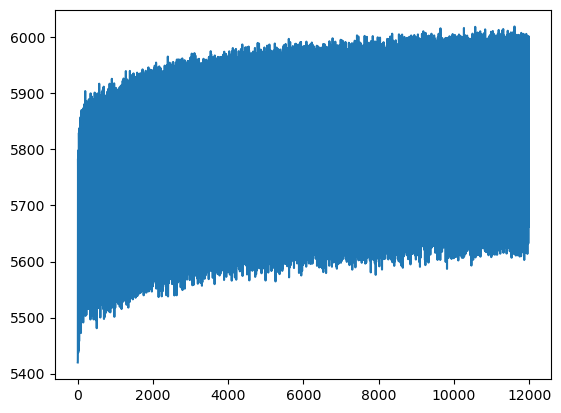

In [8]:
plt.plot(xarrayfull.mean(dim=['lat','lon']))

In [9]:
data_4xco2 = copy.deepcopy(xarrayfull)

# Pre-industrial

In [10]:
path_files = '/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/piControl/r1i1p1f1/Amon/zg/gn/latest/'

In [11]:
files = np.sort(np.array(glob.glob(f'{path_files}*')))

In [13]:
filestemp = files
listxarrays = []
for file in filestemp:
    dstemp = xr.open_dataset(file)
    # dstemp = dstemp.sel(time=slice('1850-01-01', '2100-12-31'))
    dstemp = dstemp.sel(plev=50000)
    dstemp = dstemp.zg.where((dstemp.lat>=10),drop=True)
    # Transpose the data to match the desired dimension order
    dstemp_transposed = dstemp.transpose('time', 'lat', 'lon')
    lat0=20; lat1=80; lon0=180; lon1=330
    dstemp_transposed = dstemp_transposed.where((dstemp_transposed.lat>=lat0)&(dstemp_transposed.lat<=lat1)&\
                           (dstemp_transposed.lon>=lon0)&(dstemp_transposed.lon<=lon1),drop=True)
    
    # Recreate the DataArray with the coordinates in the desired order
    dstemp_reordered = xr.DataArray(
        dstemp_transposed.values,
        dims=['time', 'lat', 'lon'],
        coords={
            'time': dstemp_transposed.coords['time'],
            'lat': dstemp_transposed.coords['lat'],
            'lon': dstemp_transposed.coords['lon']
        },
        attrs=dstemp.attrs,
        name=dstemp.name
    )
    listxarrays.append(dstemp_reordered)

xarrayfull = xr.concat(listxarrays, dim='time')
xarrayfull = xarrayfull.drop_duplicates('time',keep='first')
xarrayfull.to_netcdf('/glade/derecho/scratch/jhayron/Data4WRsClimateChange/CESM2_4xCO2/Z500_Monthly_pi.nc')

/glade/work/jhayron/conda-envs/weather_regimes/lib/python3.9/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'zg' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/work/jhayron/conda-envs/weather_regimes/lib/python3.9/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'zg' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/work/jhayron/conda-envs/weather_regimes/lib/python3.9/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'zg' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/work/jhayron/conda-envs/weather_regimes/lib/python3.9/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'zg' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, nam

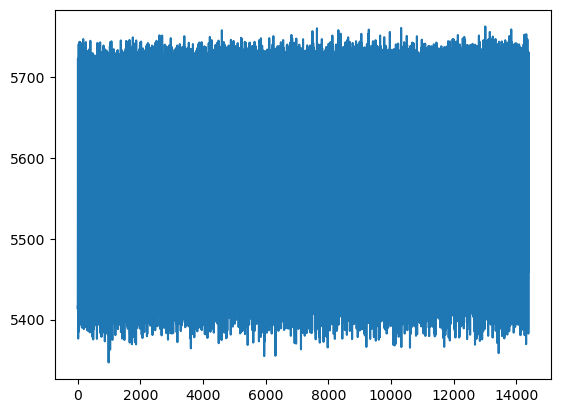

In [14]:
plt.plot(xarrayfull.mean(dim=['lat','lon']))

In [15]:
data_preindustrial = copy.deepcopy(xarrayfull)

# Compute anomalies of 4xCO2 with pi climatology

In [16]:
def standardize_by_month(data_array,data_clima):
    """
    Standardizes an xarray DataArray by subtracting the multi-year monthly mean and dividing by the multi-year monthly standard deviation.

    Args:
        data_array (xr.DataArray): The input DataArray with a 'time' coordinate.

    Returns:
        xr.DataArray: The standardized DataArray.
    """

    monthly_mean = data_clima.groupby("time.month").mean("time")
    monthly_std = data_clima.groupby("time.month").std("time")

    standardized_data = data_array.groupby("time.month")
    standardized_data = standardized_data.apply(lambda x: (x - monthly_mean.sel(month=x["time.month"])) / monthly_std.sel(month=x["time.month"]))

    return standardized_data

In [17]:
anoms = standardize_by_month(data_4xco2,data_preindustrial)

In [18]:
anoms_season = anoms.sel(time=anoms['time'].dt.month.isin([12, 1, 2, 3, 4, 5]))

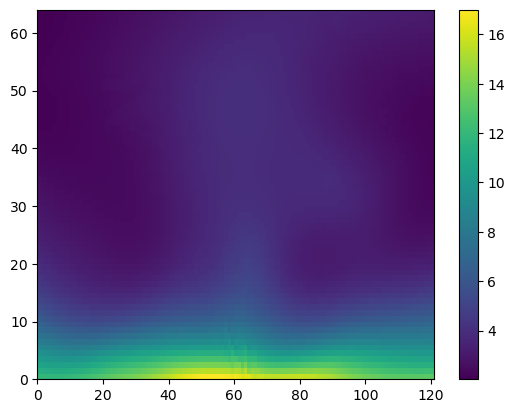

In [19]:
plt.pcolormesh(anoms_season.mean('time'))
plt.colorbar()

In [20]:
anoms_season.to_netcdf('diffs_4xco2_surface/4xco2_diffs_z500.nc')

In [1]:
anoms_season

NameError: name 'anoms_season' is not defined